>> ## Quantitative analysis for TSLA

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')


>>> #### Load data

In [2]:
data = pd.read_csv("./data/yfinance_data/TSLA_historical_data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0
6,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0
7,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0
8,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0


>>> ##### Ensure your data includes columns like Open, High, Low, Close, and Volume.

In [4]:
from scripts.edaAndQuantitativeAnalysis import validate_columns
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
validate_columns(data, required_columns)  

All required columns are present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3545 entries, 0 to 3544
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3545 non-null   object 
 1   Open          3545 non-null   float64
 2   High          3545 non-null   float64
 3   Low           3545 non-null   float64
 4   Close         3545 non-null   float64
 5   Adj Close     3545 non-null   float64
 6   Volume        3545 non-null   int64  
 7   Dividends     3545 non-null   float64
 8   Stock Splits  3545 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 249.4+ KB


>>> #####  Handle missing values

In [6]:
from scripts.edaAndQuantitativeAnalysis import handle_missing_values

handle_missing_values(data)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0


>>> ##### Analyze statistics

In [7]:
from scripts.edaAndQuantitativeAnalysis import analyze_statistics
  
analyze_statistics(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

              Open         High          Low    Adj Close        Close  \
count  3545.000000  3545.000000  3545.000000  3545.000000  3545.000000   
mean     75.505658    77.159237    73.743492    75.487264    75.487264   
std     102.530489   104.806516   100.051787   102.456615   102.456615   
min       1.076000     1.108667     0.998667     1.053333     1.053333   
25%      11.516667    11.861333    11.216667    11.565333    11.565333   
50%      17.463333    17.688667    17.100000    17.459333    17.459333   
75%     161.880005   165.333328   158.360001   161.479996   161.479996   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  3.545000e+03  
mean   9.699708e+07  
std    7.866828e+07  
min    1.777500e+06  
25%    4.770600e+07  
50%    8.250600e+07  
75%    1.228890e+08  
max    9.140820e+08  


>>> ##### visualize distribution 

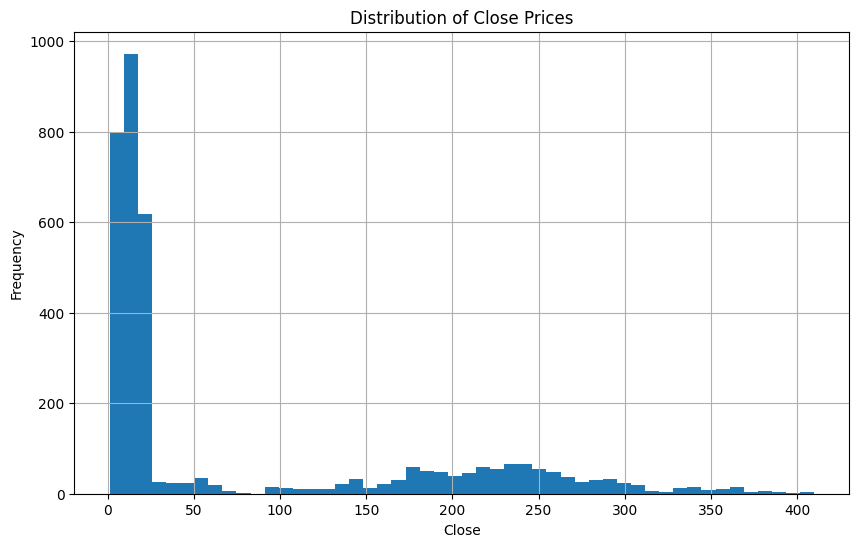

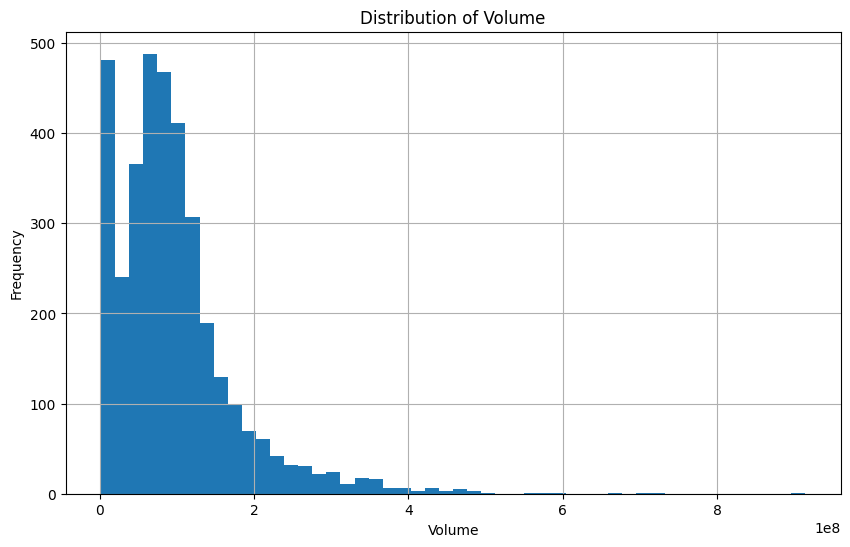

In [8]:
from scripts.edaAndQuantitativeAnalysis import plot_distributions
plot_distributions(data, 'Close', title="Distribution of Close Prices")
plot_distributions(data, 'Volume', title="Distribution of Volume")

>>> ##### Analyze correlation


Correlation Matrix:
               Open      High       Low  Adj Close     Close    Volume
Open       1.000000  0.999724  0.999626   0.999219  0.999219  0.105546
High       0.999724  1.000000  0.999633   0.999650  0.999650  0.109179
Low        0.999626  0.999633  1.000000   0.999687  0.999687  0.102287
Adj Close  0.999219  0.999650  0.999687   1.000000  1.000000  0.106500
Close      0.999219  0.999650  0.999687   1.000000  1.000000  0.106500
Volume     0.105546  0.109179  0.102287   0.106500  0.106500  1.000000


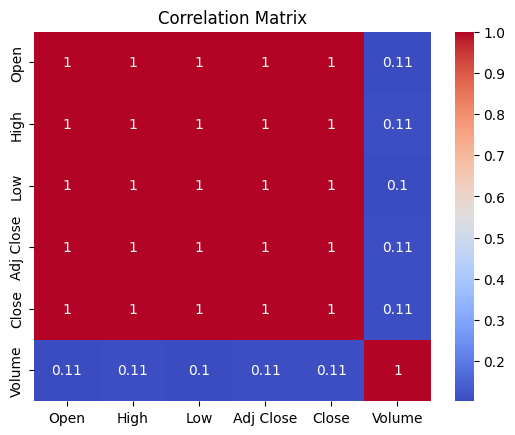

In [9]:
from scripts.edaAndQuantitativeAnalysis import analyze_correlations
analyze_correlations(data, ['Open', 'High', 'Low', 'Adj Close', 'Close', 'Volume'])

>>> ##### study volatility

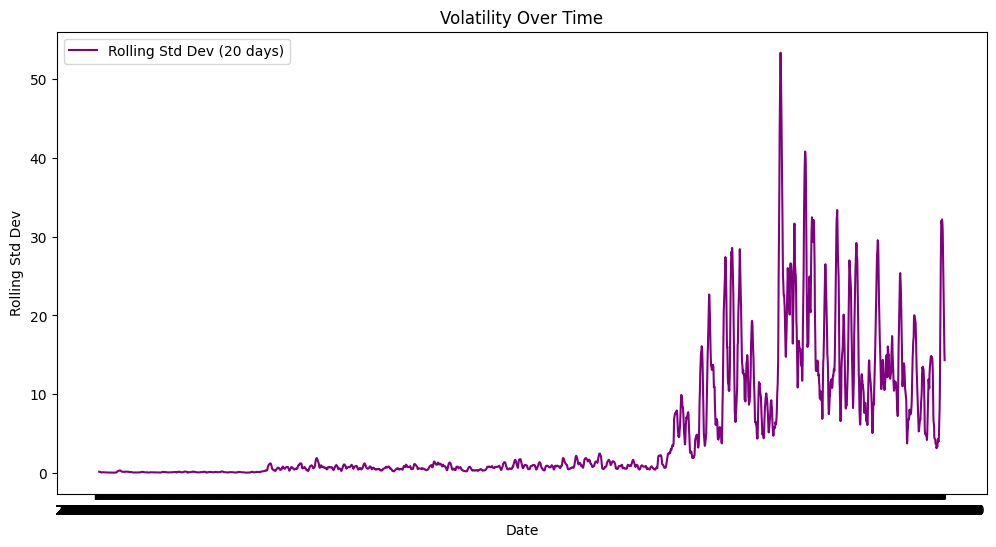

In [10]:
from scripts.edaAndQuantitativeAnalysis import plot_volatility
plot_volatility(data, 'Close', 'Date')

> # Quantitative analysis

>> ### calculate indicator

In [11]:
from scripts.edaAndQuantitativeAnalysis import calculate_indicators
data = calculate_indicators(data)

In [12]:
from scripts.edaAndQuantitativeAnalysis import calculate_financial_metrics
data = calculate_financial_metrics(data)

>> ## Visualization

>>>> #### plot_stock_and_sma(data)

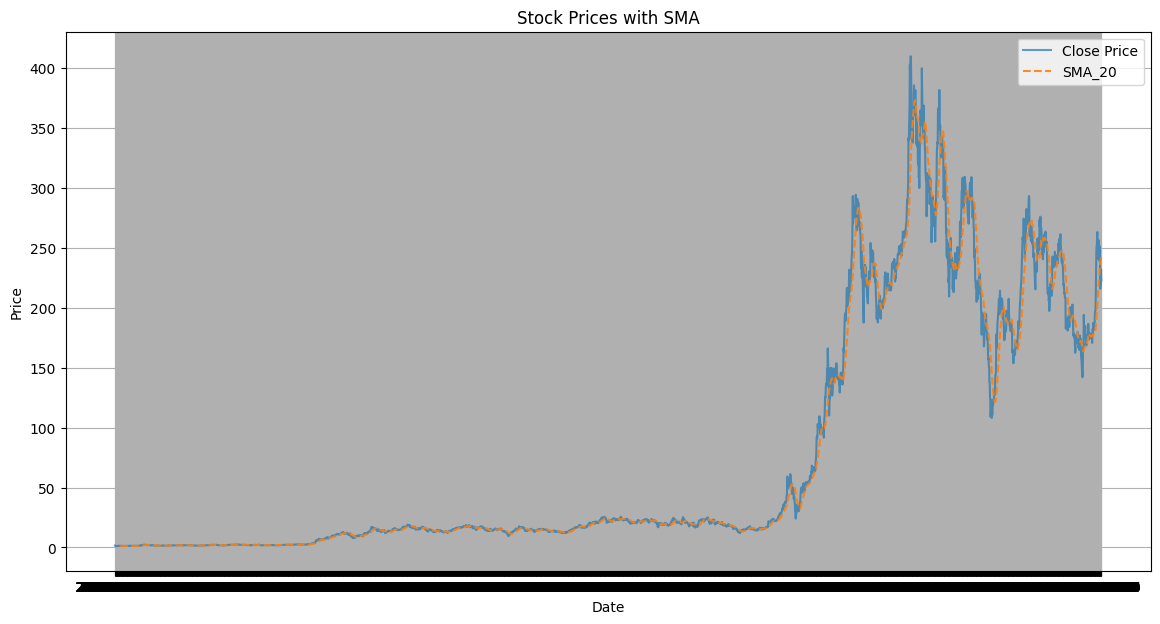

In [13]:
from scripts.edaAndQuantitativeAnalysis import plot_stock_and_sma
plot_stock_and_sma(data)

>>>>#### plot_rsi(data)

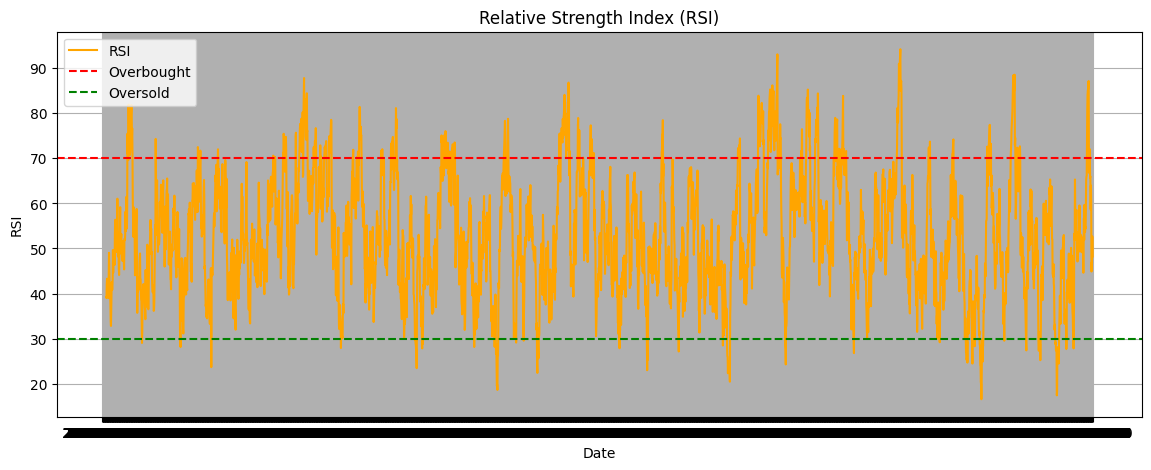

In [14]:
from scripts.edaAndQuantitativeAnalysis import plot_rsi
plot_rsi(data)

>>>> #### plot_macd(data)


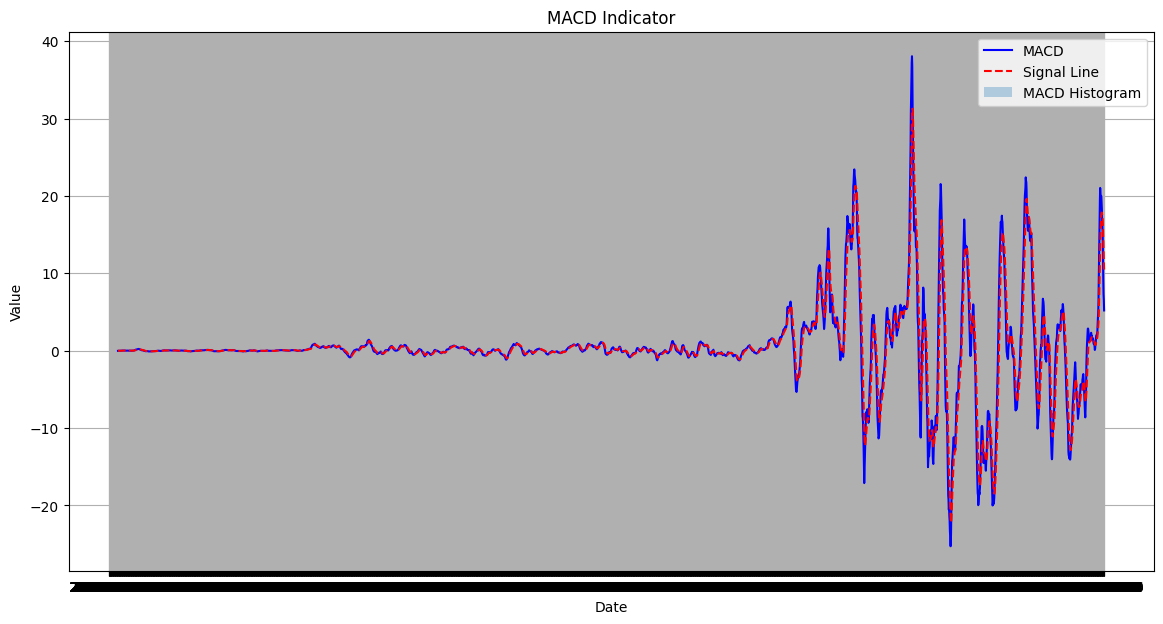

In [15]:
from scripts.edaAndQuantitativeAnalysis import plot_macd
plot_macd(data)

>>>> #### plot_financial_metrics(data)

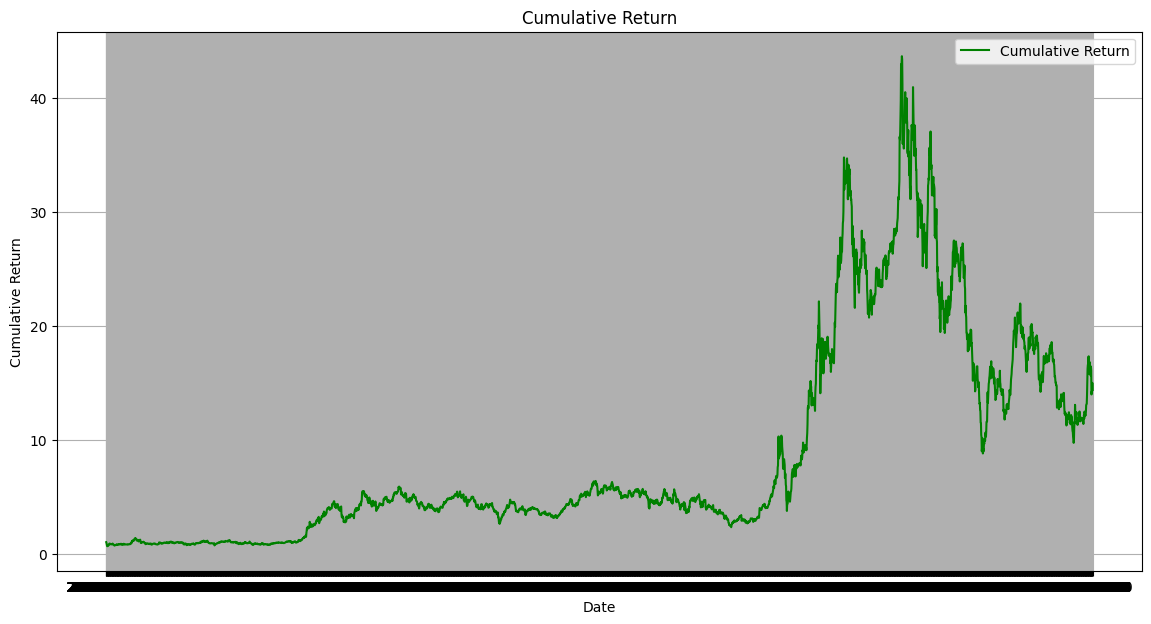

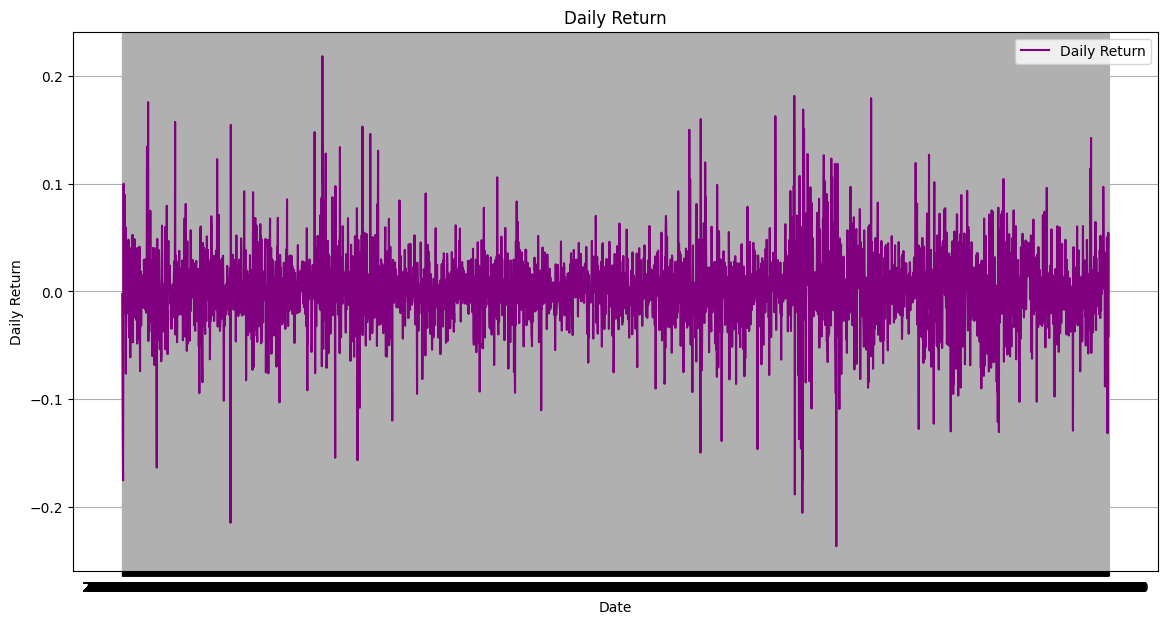

In [16]:
from scripts.edaAndQuantitativeAnalysis import plot_financial_metrics
plot_financial_metrics(data)